In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm

In [2]:
def generate_uniform(N, a, b):
    return np.random.uniform(a,b,N)

def generate_cauchy(N):
    return np.random.standard_cauchy(N)

In [35]:
def plot_intervals(type_dist, type_interval, mode='default'):
    # Uniform - student 
    N = 10
    n_values = []
    real_p = []
    all_l, all_r = [], []
    mean = 0
    z_critical = stats.norm.ppf(0.975)
    if type_dist == 'uniform':
        std_dev = np.sqrt(1/3)
        a = -1
        b = -1
    elif type_dist == '3uniform':
        std_dev = 1
        a = -3
        b = -3
    elif type_dist == 'normal':
        std_dev = 1
        a = 0
        b = 1
    
    for i in tqdm(range(5)):
        standard_error = std_dev / np.sqrt(N)
        count_exp_in_interval = []
        cur_l, cur_r = [], []
        for j in range(1000):
            if type_dist == 'uniform':
                data = generate_uniform(int(N), -1, 1)
            elif type_dist == '3uniform':
                data = generate_uniform(int(N), -1, 1) + generate_uniform(int(N), -1, 1) + generate_uniform(int(N), -1, 1)
            elif type_dist == 'normal':
                data = np.random.normal(mean, std_dev, int(N))

            if mode == 'robust_check':
                data = np.append(data, 100.0)
            
            mean_cur = np.mean(data)
            if type_interval == 'normal':
                l, r = (mean_cur - z_critical * standard_error, mean_cur + z_critical * standard_error)
            elif type_interval == 'student':
                t_value = stats.t.ppf((1 + 0.95) / 2, int(N) - 1) 
                l, r = (mean_cur - t_value * standard_error, mean_cur + t_value * standard_error)
            elif type_interval == 'hora-hora':
                d_value = np.sqrt(-np.log((1-0.95)/2)/2*int(N)) - 1/(6*int(N))
                if mode == 'robust_check':
                    sorted_data = np.sort(data)
                    a = sorted_data[1]   
                    b = sorted_data[-2]   
                l, r = (mean_cur - d_value * (b - a), mean_cur + d_value * (b - a))    
            elif type_interval == 'jackknife':
                cur_means = []
                data_original = data
                for k in range(int(N)):
                    data = np.delete(data_original, k)
                    cur_means.append(np.mean(data))
                jackknife_mean = np.mean(cur_means)
                jackknife_var = (int(N) - 1) * np.mean((cur_means - jackknife_mean) ** 2)
                l, r = jackknife_mean - 1.96 * np.sqrt(jackknife_var), jackknife_mean + 1.96 * np.sqrt(jackknife_var)
            elif type_interval == 'bootstrap':
                bootstrap_samples = []
                data_original = data
                for _ in range(100):
                    data = np.random.choice(data, int(N), replace=True)
                    bootstrap_samples.append(np.mean(data))
                bootstrap_mean = np.mean(bootstrap_samples)
                l, r = np.percentile(bootstrap_samples, [2.5, 97.5])
        
            if l <= mean and mean <= r:
                count_exp_in_interval.append(1)
            else:
                count_exp_in_interval.append(0)
    
            cur_l.append(l)
            cur_r.append(r)
        n_values.append(N)
        real_p.append(np.mean(count_exp_in_interval))
        all_l.append(np.mean(cur_l))
        all_r.append(np.mean(cur_r))
        if i % 2 == 0:
            N *= 5
        else:
            N *= 2
        
    plt.plot(n_values, real_p, marker='o')
    plt.xscale('log')
    plt.grid(True) 
    plt.show()
    
    return [n_values, all_l, all_r]

In [22]:
def plot_intervals_on_one_plot(n_values, l_uni, l_3uni, l_norm, r_uni, r_3uni, r_norm):
    plt.plot(n_values, l_uni, marker='o', label='uniform')
    plt.plot(n_values, l_3uni, marker='o', label='sum of 3 uniform')
    plt.plot(n_values, l_norm, marker='o', label = 'normal')
    plt.xscale('log')
    plt.legend()
    plt.grid(True) 
    plt.show()
    
    plt.plot(n_values, r_uni, marker='o', label='uniform')
    plt.plot(n_values, r_3uni, marker='o', label='sum of 3 uniform')
    plt.plot(n_values, r_norm, marker='o', label = 'normal')
    plt.xscale('log')
    plt.legend()
    plt.grid(True) 
    plt.show()

# Практика

## normal

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.48it/s]


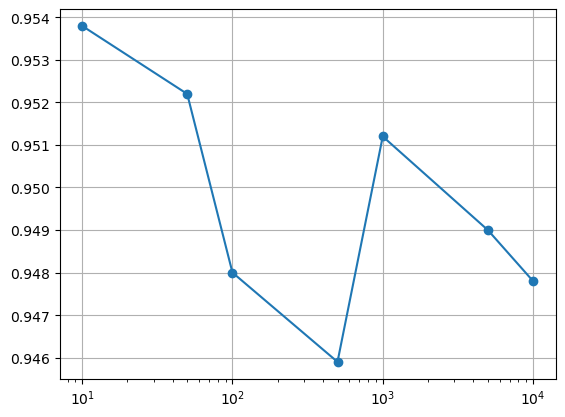

In [44]:
# Uniform - normal
n_values, l_uni, r_uni = plot_intervals('uniform', 'normal')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.19it/s]


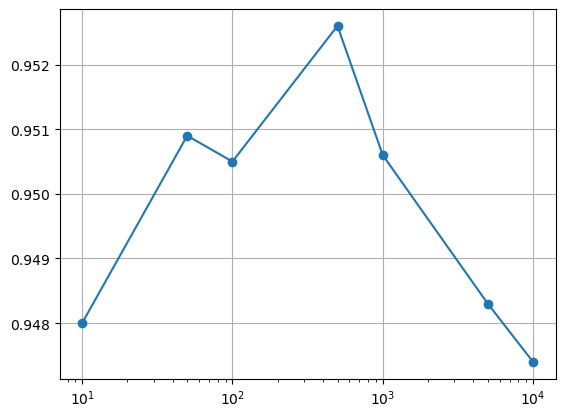

In [45]:
# Sum of three uniform - normal 
n_values, l_3uni, r_3uni = plot_intervals('3uniform', 'normal')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.44it/s]


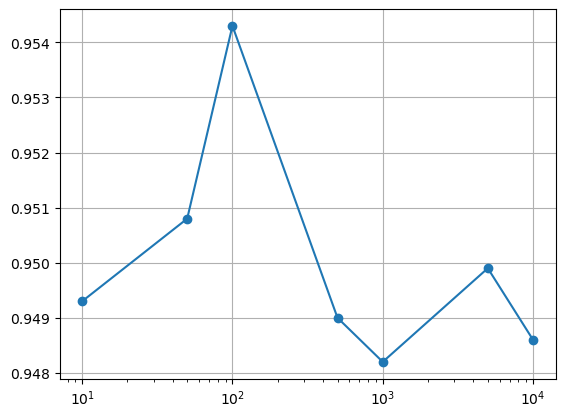

In [46]:
# Normal - normal 
n_values, l_norm, r_norm = plot_intervals('normal', 'normal')

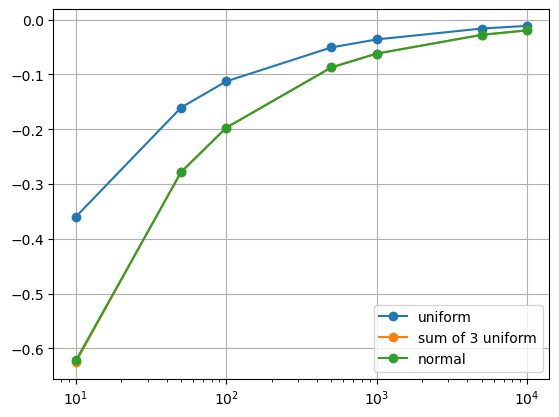

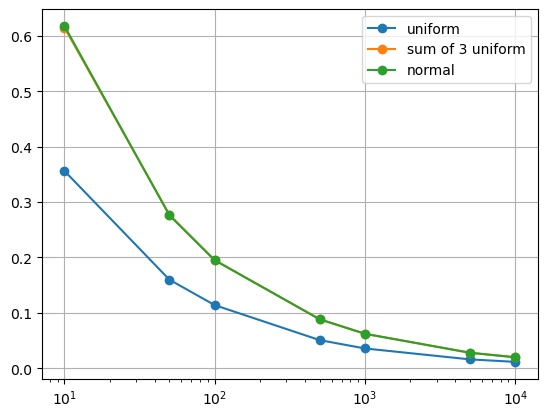

In [49]:
plot_intervals_on_one_plot(n_values, l_uni, l_3uni, l_norm, r_uni, r_3uni, r_norm)

## student

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:11<00:00,  1.68s/it]


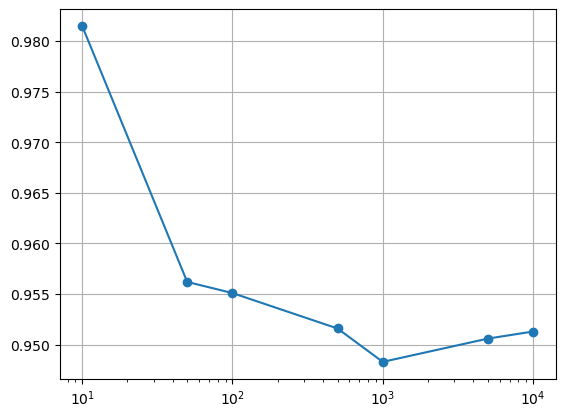

In [50]:
# Uniform - student 
n_values, l_uni, r_uni = plot_intervals('uniform', 'student')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:15<00:00,  2.27s/it]


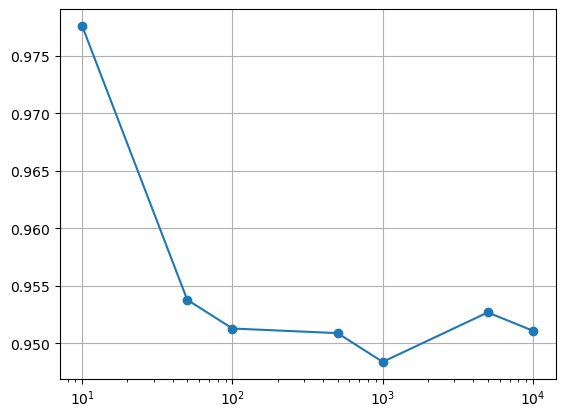

In [51]:
# Sum of three uniform - student 
n_values, l_3uni, r_3uni = plot_intervals('3uniform', 'student')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:14<00:00,  2.13s/it]


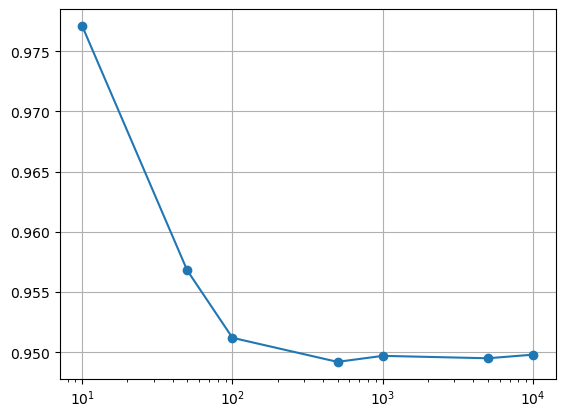

In [52]:
# Normal - student 
n_values, l_norm, r_norm = plot_intervals('normal', 'student')

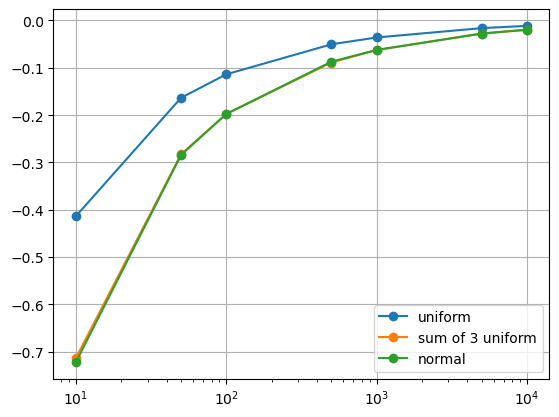

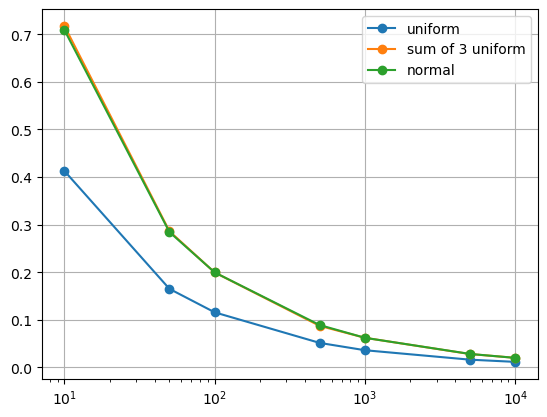

In [53]:
plot_intervals_on_one_plot(n_values, l_uni, l_3uni, l_norm, r_uni, r_3uni, r_norm)

## hora-hora

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.36it/s]


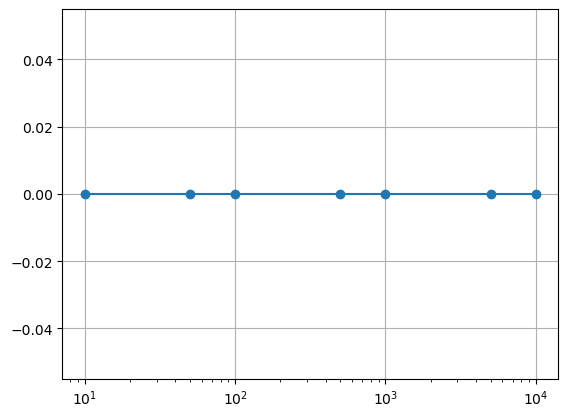

In [54]:
# Uniform - hora-hora 
n_values, l_uni, r_uni = plot_intervals('uniform', 'hora-hora')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.03it/s]


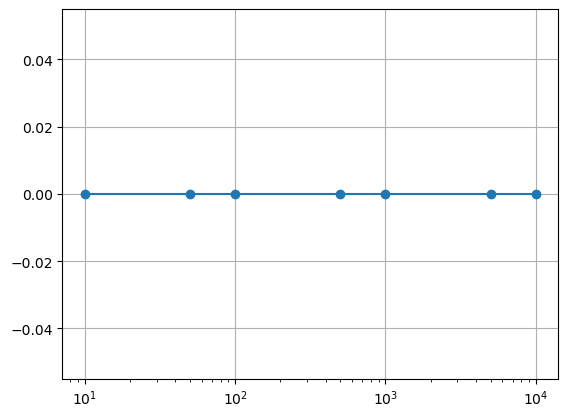

In [55]:
# Sum of 3 uniform - hora-hora 
n_values, l_3uni, r_3uni = plot_intervals('3uniform', 'hora-hora')

100%|█████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.20it/s]


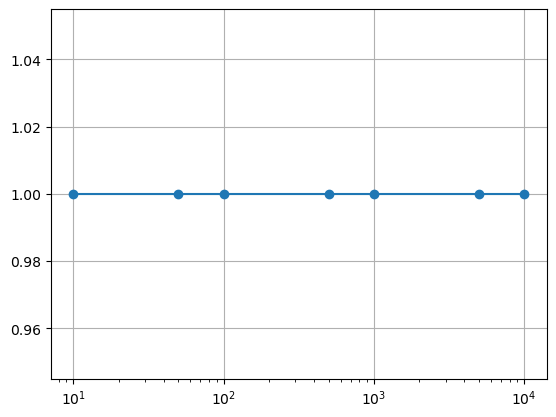

In [56]:
# Sum of three uniform - hora-hora 
n_values, l_norm, r_norm = plot_intervals('normal', 'hora-hora')

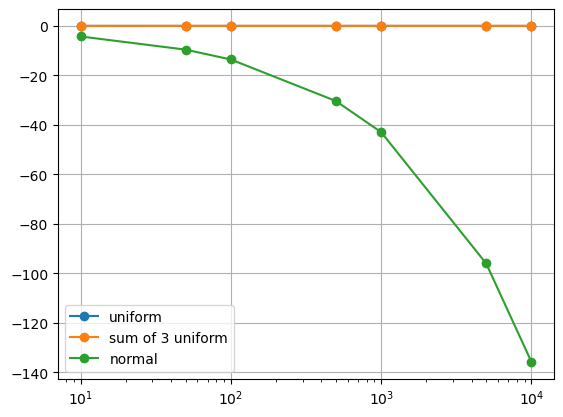

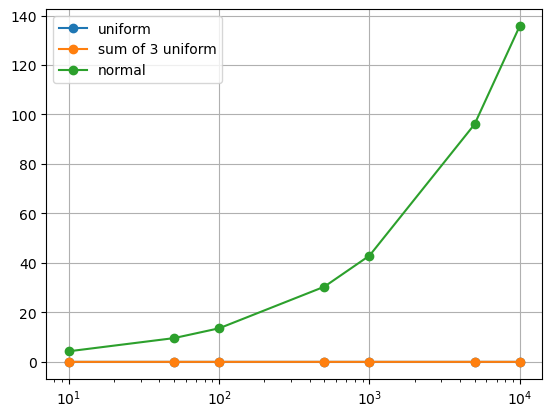

In [57]:
plot_intervals_on_one_plot(n_values, l_uni, l_3uni, l_norm, r_uni, r_3uni, r_norm)

# ДЗ

## jackknife

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.58s/it]


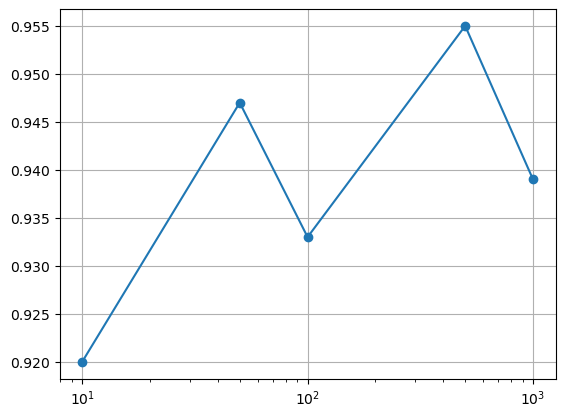

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.63s/it]


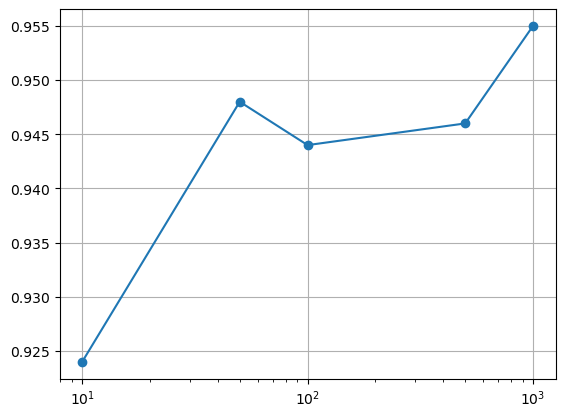

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.66s/it]


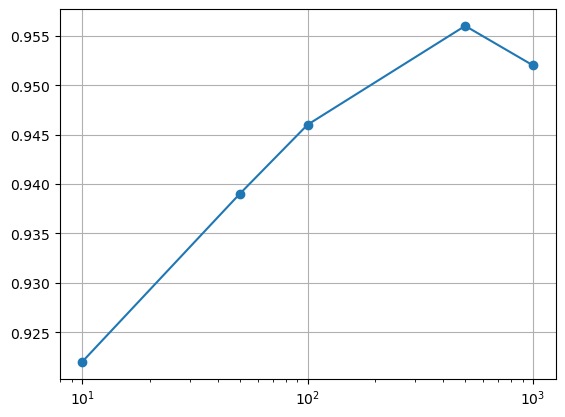

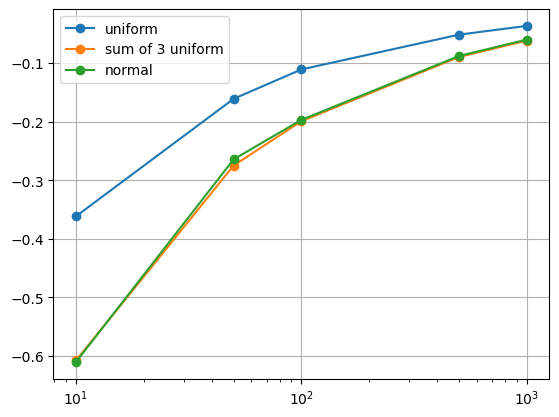

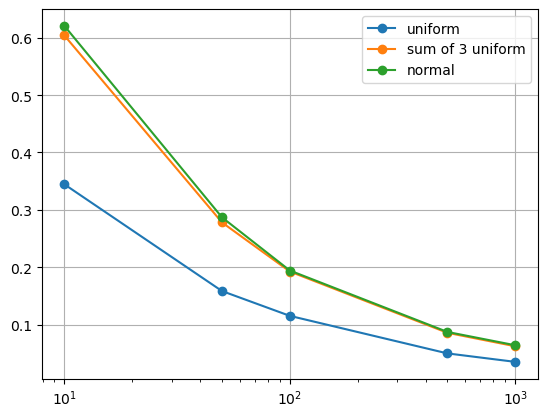

In [32]:
plot_args_l, plot_args_r = [], []
for dist in ['uniform', '3uniform', 'normal']:
    n_values, l_cur, r_cur = plot_intervals(dist, 'jackknife')
    plot_args_l.append(l_cur)
    plot_args_r.append(r_cur)
plot_intervals_on_one_plot(n_values, *plot_args_l, *plot_args_r)

## bootstrap

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.20s/it]


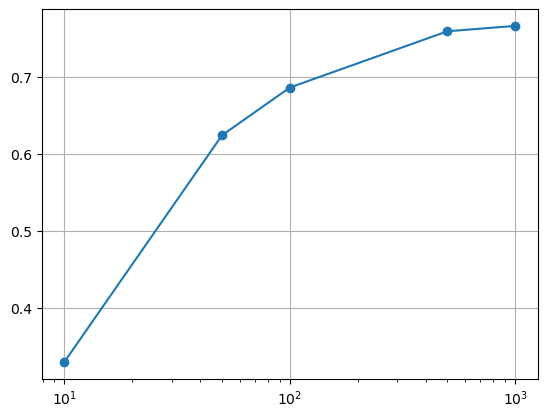

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.18s/it]


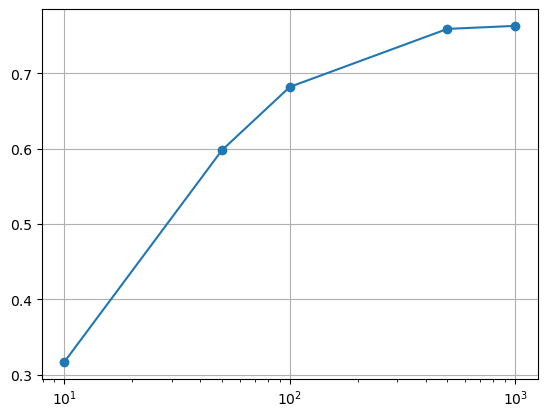

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.18s/it]


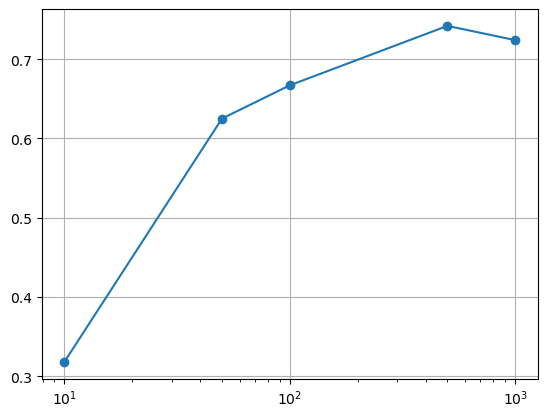

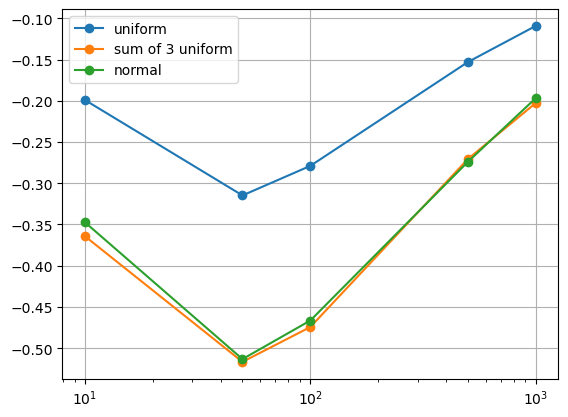

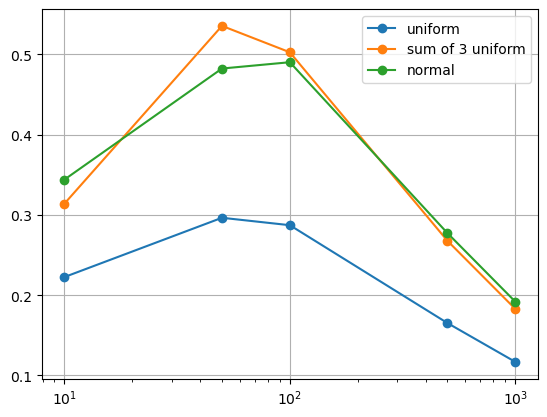

In [33]:
plot_args_l, plot_args_r = [], []
for dist in ['uniform', '3uniform', 'normal']:
    n_values, l_cur, r_cur = plot_intervals(dist, 'bootstrap')
    plot_args_l.append(l_cur)
    plot_args_r.append(r_cur)
plot_intervals_on_one_plot(n_values, *plot_args_l, *plot_args_r)

## robust check

======================================================================NORMAL======================================================================



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 126.89it/s]


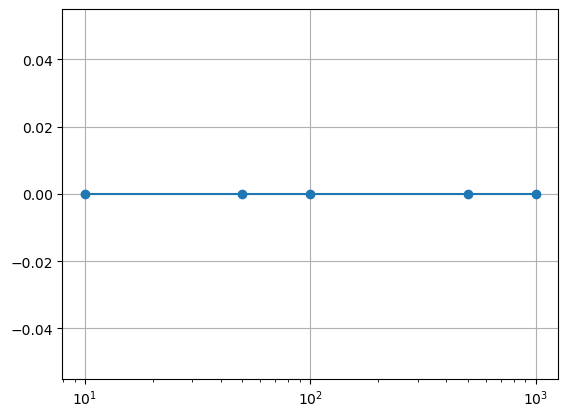

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 59.73it/s]


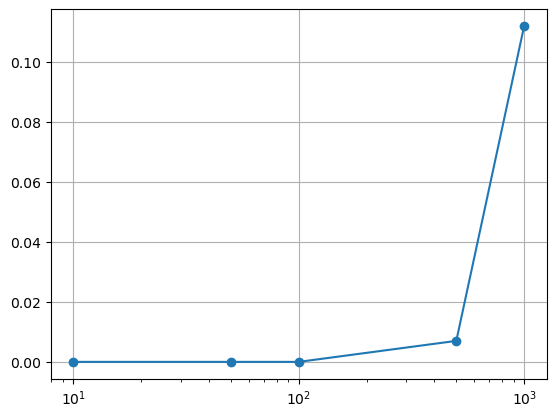

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 103.18it/s]


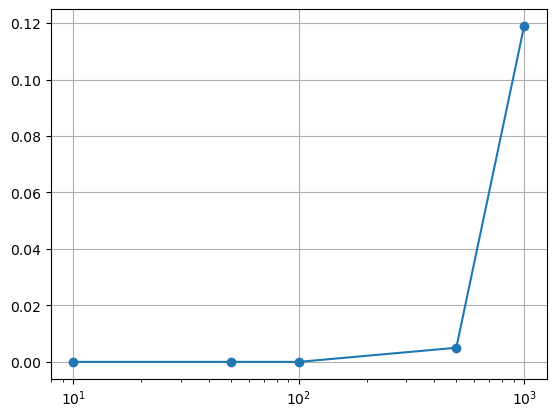

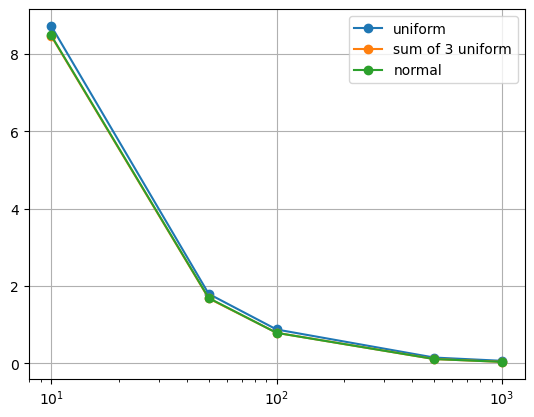

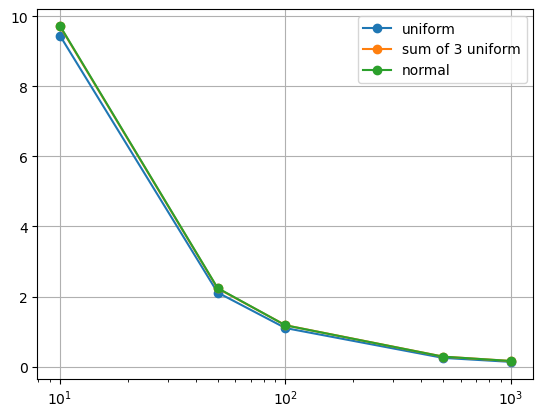



======================================================================STUDENT======================================================================



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 135.03it/s]


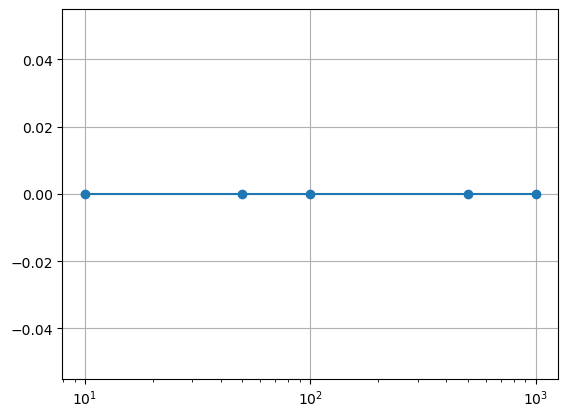

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 59.88it/s]


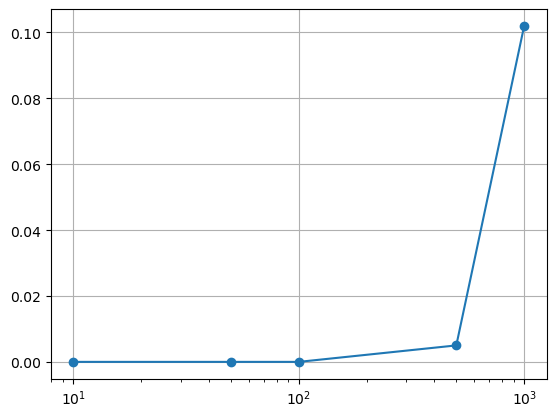

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 98.27it/s]


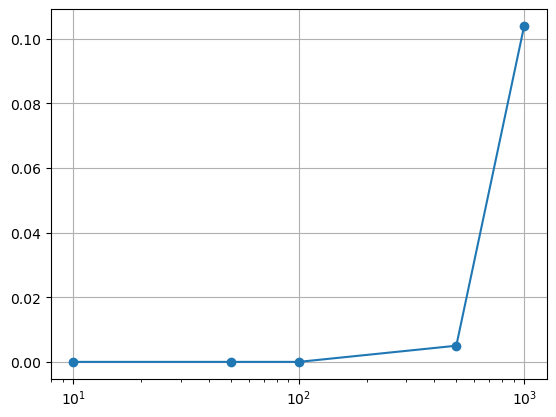

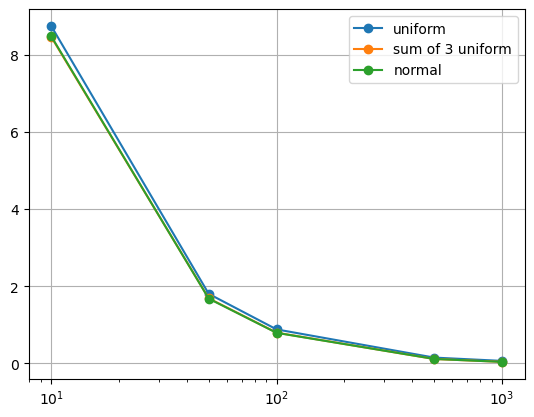

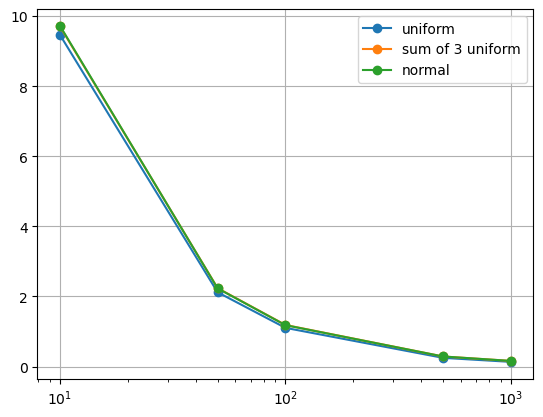



======================================================================HORA-HORA======================================================================



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 133.86it/s]


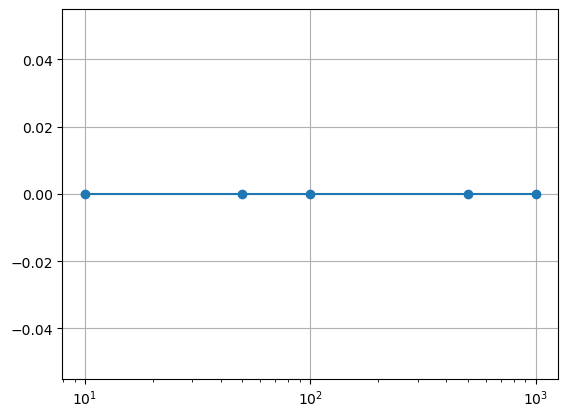

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 75.10it/s]


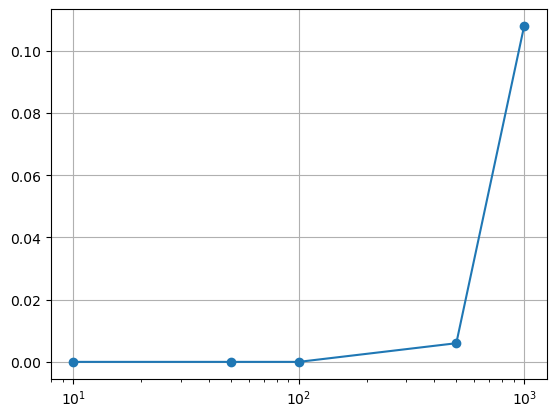

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 89.24it/s]


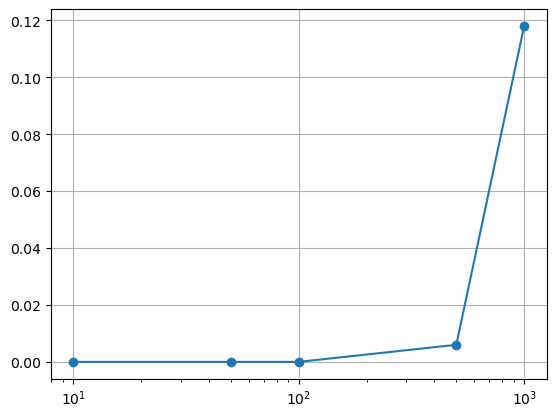

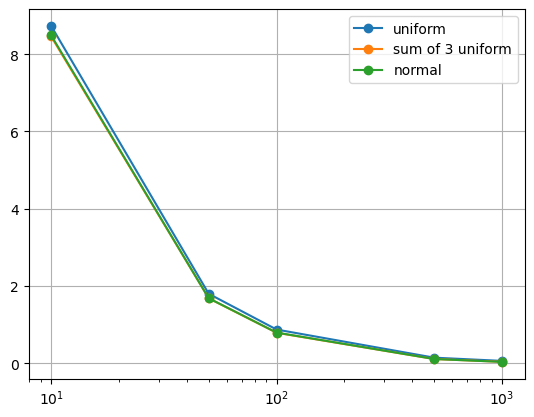

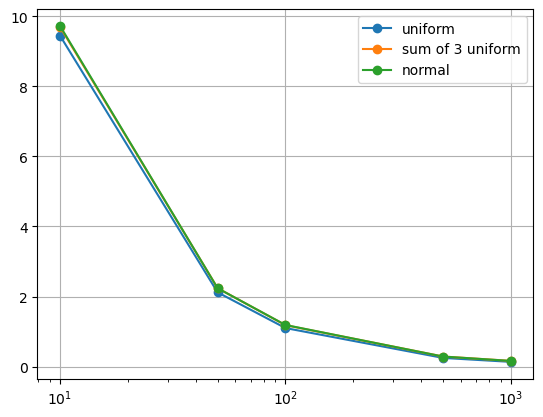

In [41]:
for interval in ['normal', 'student', 'hora-hora']:
    print("="*70 + interval.upper() + "="*70)
    print()
    plot_args_l, plot_args_r = [], []
    for dist in ['uniform', '3uniform', 'normal']:
        n_values, l_cur, r_cur = plot_intervals(dist, 'normal', 'robust_check')
        plot_args_l.append(l_cur)
        plot_args_r.append(r_cur)
    plot_intervals_on_one_plot(n_values, *plot_args_l, *plot_args_r)
    print()
    print()